In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('final.csv')
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
df1 = df.copy()

/var/folders/cj/29w3grxs70lgdvq77tw2_7040000gn/T/ipykernel_68796/4133549922.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('final.csv')


In [13]:
df1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,...,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,year,quarter,inflation,normalized_resale_price,latitude,longitude
0,1998-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,10 TO 12,73.0,NEW GENERATION,1976,170500.0,...,177.562823,Ang Mo Kio Secondary School,224,0,1998,1,1.302993,222160.322453,1.366197,103.841505
1,1998-05,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,NEW GENERATION,1976,170000.0,...,177.562823,Ang Mo Kio Secondary School,224,0,1998,2,1.414592,240480.602810,1.366197,103.841505
2,1998-07,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,01 TO 03,73.0,NEW GENERATION,1976,157000.0,...,177.562823,Ang Mo Kio Secondary School,224,0,1998,3,1.625165,255150.866106,1.366197,103.841505
3,1998-07,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,01 TO 03,73.0,NEW GENERATION,1976,150000.0,...,177.562823,Ang Mo Kio Secondary School,224,0,1998,3,1.625165,243774.712840,1.366197,103.841505
4,1998-07,ANG MO KIO,4 ROOM,216,ANG MO KIO AVE 1,10 TO 12,88.0,NEW GENERATION,1976,263000.0,...,177.562823,Ang Mo Kio Secondary School,224,0,1998,3,1.625165,427418.329846,1.366197,103.841505


In [14]:
df1.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'address', 'commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion', 'total_dwelling_units', 'postal', 'planning_area',
       'mall_nearest_distance', 'hawker_nearest_distance',
       'hawker_food_stalls', 'hawker_market_stalls', 'mrt_nearest_distance',
       'mrt_name', 'bus_interchange', 'mrt_interchange',
       'bus_stop_nearest_distance', 'bus_stop_name',
       'pri_sch_nearest_distance', 'pri_sch_name', 'vacancy',
       'pri_sch_affiliation', 'sec_sch_nearest_dist', 'sec_sch_name',
       'cutoff_point', 'affiliation', 'year', 'quarter', 'inflation',
       'normalized_resale_price', 'latitude', 'longitude'],
      dtype='object')

In [20]:
# show the numerical columns and categorical columns respectively
numerical_columns = df1.select_dtypes(include=[np.number]).columns
categorical_columns = df1.columns.difference(numerical_columns)

print(numerical_columns)
print('\n')
print(categorical_columns)

Index(['floor_area_sqm', 'lease_commence_date', 'resale_price', 'commercial',
       'market_hawker', 'multistorey_carpark', 'precinct_pavilion',
       'total_dwelling_units', 'postal', 'mall_nearest_distance',
       'hawker_nearest_distance', 'hawker_food_stalls', 'hawker_market_stalls',
       'mrt_nearest_distance', 'bus_interchange', 'mrt_interchange',
       'bus_stop_nearest_distance', 'pri_sch_nearest_distance', 'vacancy',
       'pri_sch_affiliation', 'sec_sch_nearest_dist', 'cutoff_point',
       'affiliation', 'year', 'quarter', 'inflation',
       'normalized_resale_price', 'latitude', 'longitude'],
      dtype='object')


Index(['address', 'block', 'bus_stop_name', 'flat_model', 'flat_type', 'month',
       'mrt_name', 'planning_area', 'pri_sch_name', 'sec_sch_name',
       'storey_range', 'street_name', 'town'],
      dtype='object')


## Let's look at Cat. Variables first

In [24]:
df_cat = df1[categorical_columns]
df_cat.head()

,address,block,bus_stop_name,flat_model,flat_type,month,mrt_name,planning_area,pri_sch_name,sec_sch_name,storey_range,street_name,town
0,"216, ANG MO KIO AVE 1",216,BLK 220,NEW GENERATION,3 ROOM,1998-01,Ang Mo Kio,Ang Mo Kio,Ang Mo Kio Primary School,Ang Mo Kio Secondary School,10 TO 12,ANG MO KIO AVE 1,ANG MO KIO
1,"216, ANG MO KIO AVE 1",216,BLK 220,NEW GENERATION,3 ROOM,1998-05,Ang Mo Kio,Ang Mo Kio,Ang Mo Kio Primary School,Ang Mo Kio Secondary School,07 TO 09,ANG MO KIO AVE 1,ANG MO KIO
2,"216, ANG MO KIO AVE 1",216,BLK 220,NEW GENERATION,3 ROOM,1998-07,Ang Mo Kio,Ang Mo Kio,Ang Mo Kio Primary School,Ang Mo Kio Secondary School,01 TO 03,ANG MO KIO AVE 1,ANG MO KIO
3,"216, ANG MO KIO AVE 1",216,BLK 220,NEW GENERATION,3 ROOM,1998-07,Ang Mo Kio,Ang Mo Kio,Ang Mo Kio Primary School,Ang Mo Kio Secondary School,01 TO 03,ANG MO KIO AVE 1,ANG MO KIO
4,"216, ANG MO KIO AVE 1",216,BLK 220,NEW GENERATION,4 ROOM,1998-07,Ang Mo Kio,Ang Mo Kio,Ang Mo Kio Primary School,Ang Mo Kio Secondary School,10 TO 12,ANG MO KIO AVE 1,ANG MO KIO


In [25]:
# check nunique values of each categorical column
for col in df_cat.columns:
    print(f'{col}: {df_cat[col].nunique()}')

address: 9013
block: 2995
bus_stop_name: 1637
flat_model: 32
flat_type: 8
month: 312
mrt_name: 94
planning_area: 32
pri_sch_name: 177
sec_sch_name: 134
storey_range: 25
street_name: 547
town: 26


### flat_model, flat_type, storey_range and town appear to be the only relavant features

In [28]:
cat_variations = ['flat_model', 'flat_type', 'storey_range', 'town']

# town and planning_area are the very much similar, so we can drop planning_area

In [31]:
df_cat['storey_range'].value_counts()

# needs further cleaning this one

storey_range
04 TO 06    179166
07 TO 09    161013
01 TO 03    143135
10 TO 12    137002
13 TO 15     49936
16 TO 18     19529
19 TO 21      8959
22 TO 24      5804
25 TO 27      2719
01 TO 05      2699
06 TO 10      2472
28 TO 30      1382
11 TO 15      1259
31 TO 33       448
34 TO 36       432
37 TO 39       409
16 TO 20       265
40 TO 42       203
21 TO 25        92
43 TO 45        44
46 TO 48        41
26 TO 30        39
49 TO 51        17
36 TO 40         7
31 TO 35         2
Name: count, dtype: int64

TypeError: inner() got multiple values for argument 'ax'

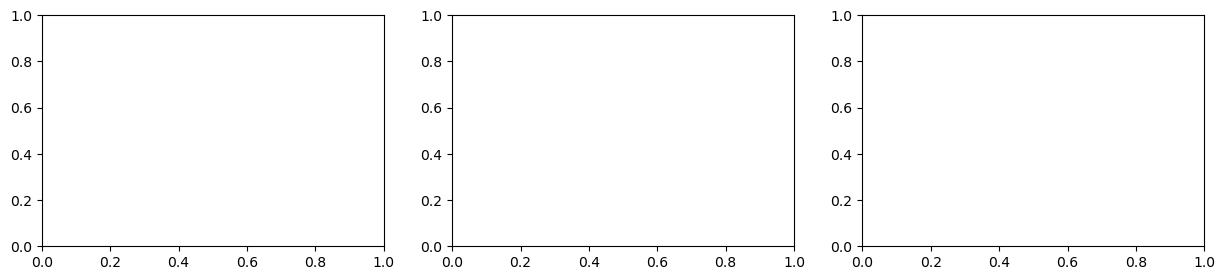

In [37]:
# generate 3 plots using subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
# count plot for flat_model
plt.bar(df_cat['flat_model'].unique(), df_cat['flat_model'].value_counts(), ax=axs[0])

# count plot for flat_type
sns.countplot(df_cat['flat_type'], ax=axs[1])
axs[1].set_title('Flat Type Count')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, horizontalalignment='right')

# count plot for storey_range
sns.countplot(df_cat['town'], ax=axs[2])
axs[2].set_title('Storey Range Count')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

ValueError: could not convert string to float: 'ANG MO KIO'

<Figure size 1500x500 with 0 Axes>